Prerequisites
--------
------------


Registration number: 191910

In [1]:
!pip install control

     |████████████████████████████████| 339 kB 7.0 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=25389e94bc2ea5b9fc581a80c144b91136955d974bb4abc8b9a5811c56c76ced
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


In [2]:
#all import statements
import numpy as np
import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.fft import fft, ifft

from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,12),
    "font.size": 24})

import control

Some Custom Functions to help in plotting
------------------------------------

In [3]:
def custom_plot(x, y, label=None, title=None, xlabel=None, ylabel=None, timerange=None, save=None, legend=None ):
 
 plt.plot(x, y, label=label)
 plt.xlabel(xlabel)
 plt.ylabel(ylabel)
 plt.title(title)
 plt.xlim(timerange)
 if legend:
        plt.legend()
 if save:
    plt.savefig(save+'.png')
 plt.tight_layout()

def custom_stem(x, y, label=None, title=None, xlabel=None, ylabel=None, timerange=None, save=None, legend=None, color=None):
 col='b'
 if color:
    col=color
 markerline, stemline, baseline= plt.stem(x, y, label=label)
 plt.setp(stemline, color=col)
 plt.setp(markerline, color=col)
 plt.xlabel(xlabel)
 plt.ylabel(ylabel)
 plt.title(title)
 plt.xlim(timerange)
 if legend:
        plt.legend()
 if save:
    plt.savefig(save+'.png')
 plt.tight_layout()

def mag_spectrum_plot(x, Fs, max_freq=None, label=None, title=None, save=None, color=None, norm=None):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2)
    X = np.abs(fft(x)[0:C])
    if norm:
        X=X/len(X)
    N = (np.arange(0, C)/ len(x))*Fs
    plt.plot(N, X, color=color, label=label)
    plt.title(title)
    plt.xlabel(r'$F(Hz)$')
    plt.ylabel(r'$|X(F)|$')
    if save:
        plt.savefig(save+'.png', format='png')
    plt.tight_layout()
    


Problem  #1
-----
-----

Question 1
---------------

Transfer function H1(z) for Ro=  0.9 
   z
-------
z - 0.9

Transfer function H1(z) for Ro=  1 
  z
-----
z - 1

Transfer function H1(z) for Ro=  1.1 
   z
-------
z - 1.1

Transfer function H1(z) for Ro=  2 
  z
-----
z - 2



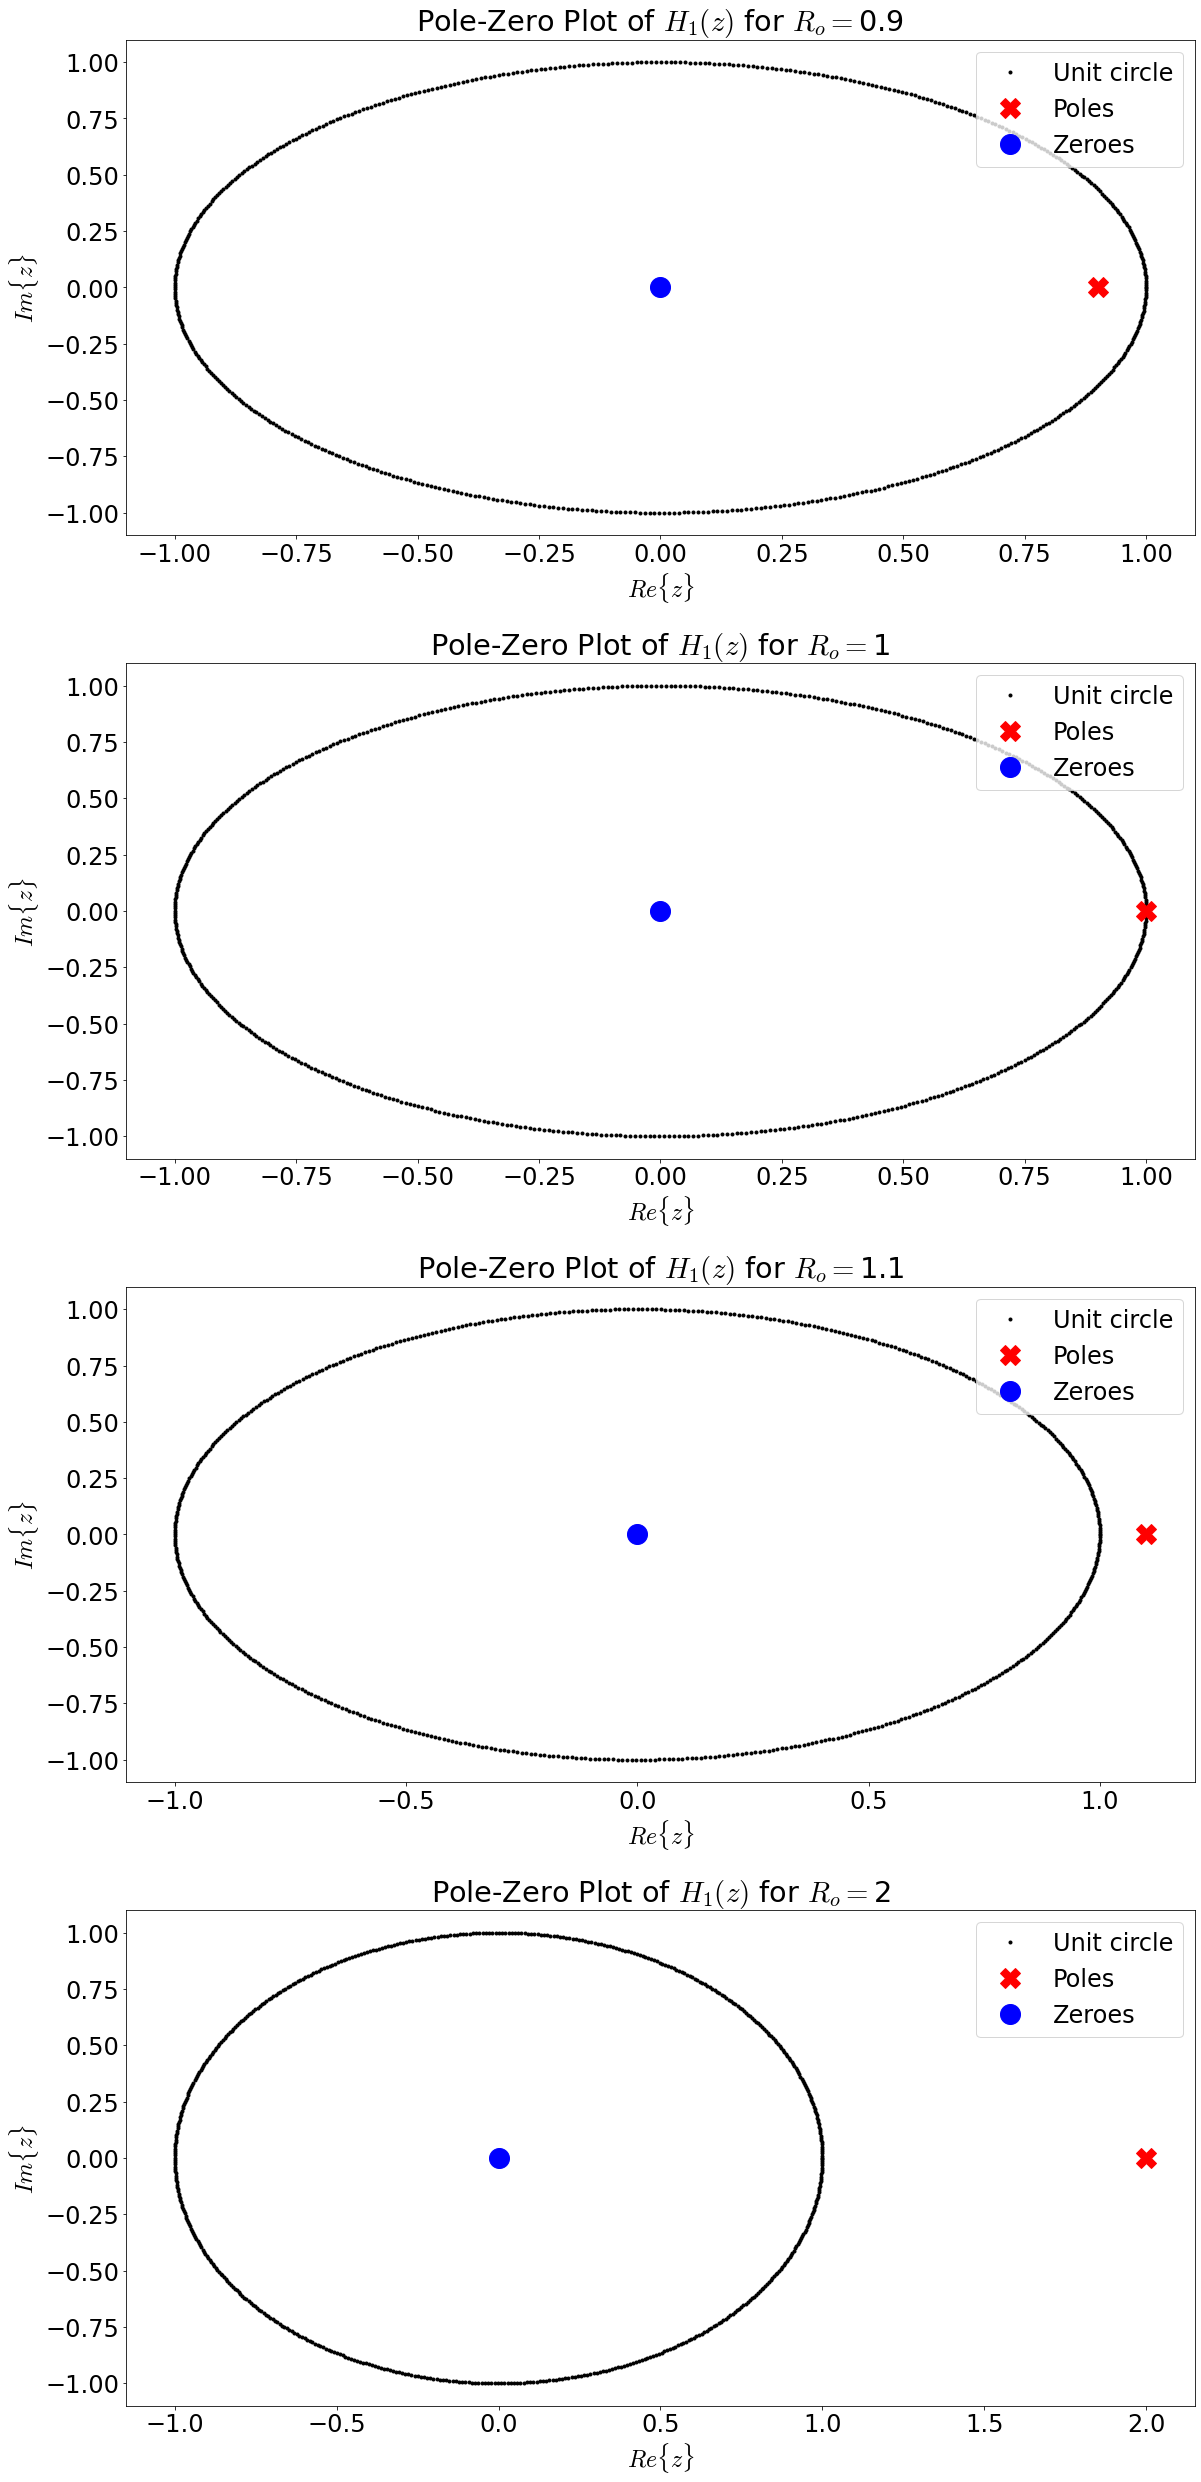

In [4]:
Ro=[0.9, 1, 1.1, 2]
b=[]
a=[]
plt.rcParams['figure.figsize'] = [17, 35]
for i in range(len(Ro)):
    b.append(np.array([1, 0]))
    a.append(np.array([1, -Ro[i]]))
    print(r'Transfer function H1(z) for Ro= ',Ro[i], control.TransferFunction(b[i], a[i], dt=True))
    plt.subplot(410+i+1)
    z, p, k=sp.tf2zpk(b[i], a[i])
    theta=np.arange(0, 2*np.pi, 0.01)
    plt.plot(np.cos(theta), np.sin(theta), 'k.', label='Unit circle')
    plt.plot(np.real(p), np.imag(p), 'rX', label='Poles', markersize='20')
    plt.plot(np.real(z), np.imag(z), 'bo', label='Zeroes', markersize='20')
    plt.legend(loc='upper right')
    plt.title(r'Pole-Zero Plot of $H_{1}(z)$ for $R_{o} = $' + str(Ro[i]))
    plt.xlabel(r'$Re\{z\}$')
    plt.ylabel(r'$Im\{z\}$')

plt.tight_layout()
plt.savefig('Q1_pzplot.png')

Question 2
---------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

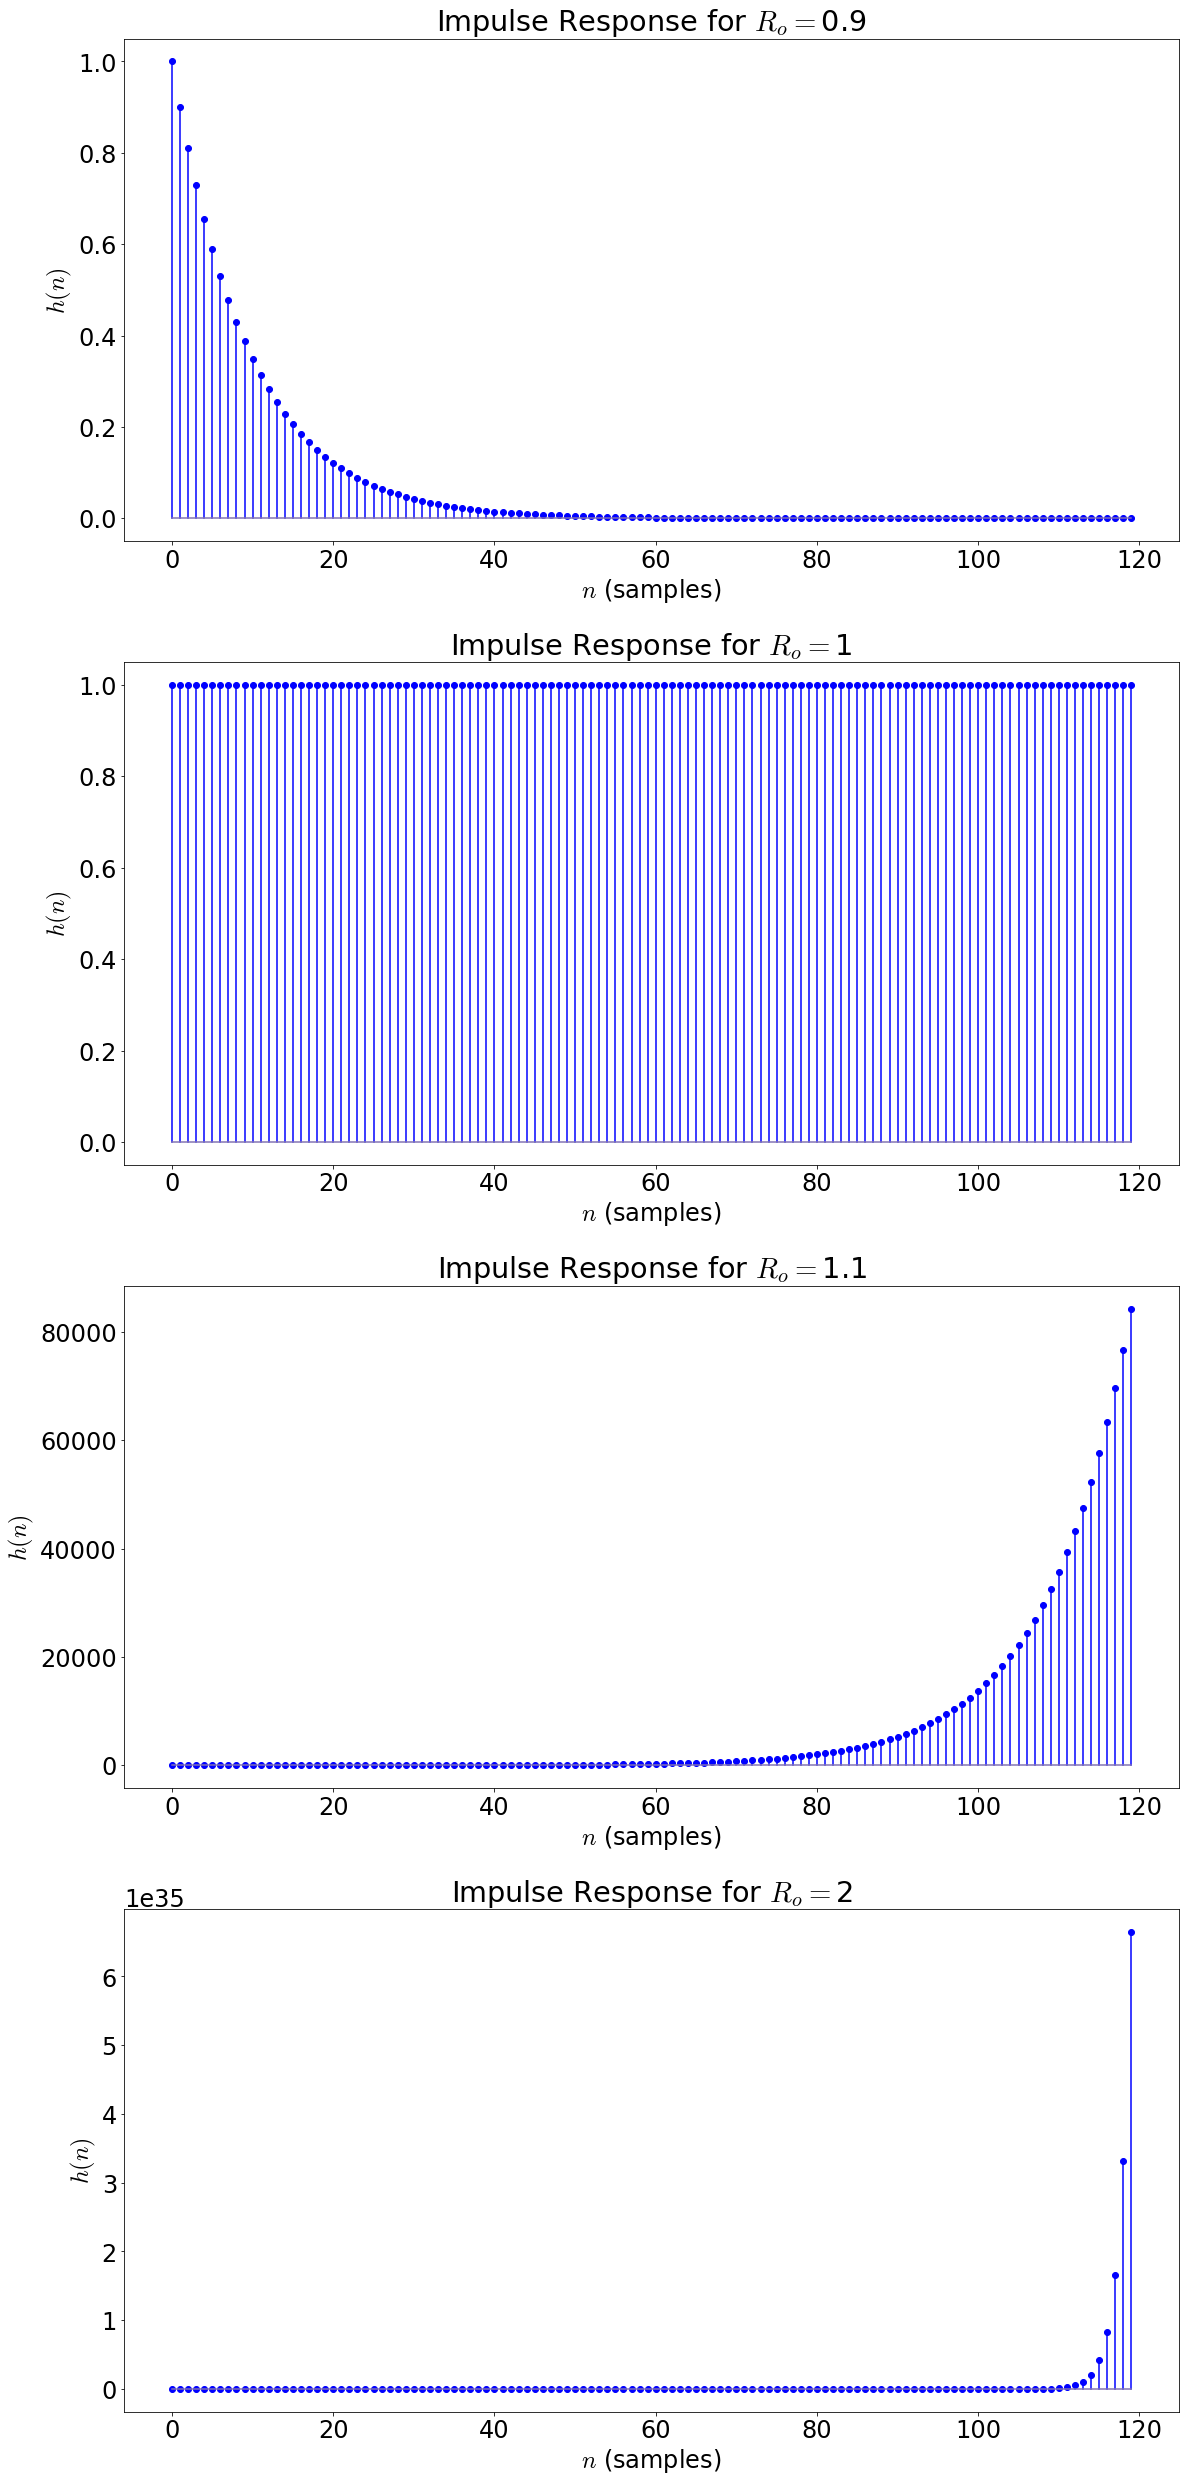

In [5]:
n=np.arange(120)
x=np.zeros(120)
x[0]=1
y=[]
for i in range(len(Ro)):
    y.append(sp.lfilter(b[i], a[i], x))
    plt.subplot(410+i+1)
    custom_stem(n, y[i], title=r'Impulse Response for $R_{o} = $'+str(Ro[i]), xlabel=r'$n$ (samples)', ylabel=r'$h(n)$')
plt.savefig('Q1_tdomain.png')

Question 3
---------------

Number of days taken to reach 1 million infections with Ro = 2.5:  16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


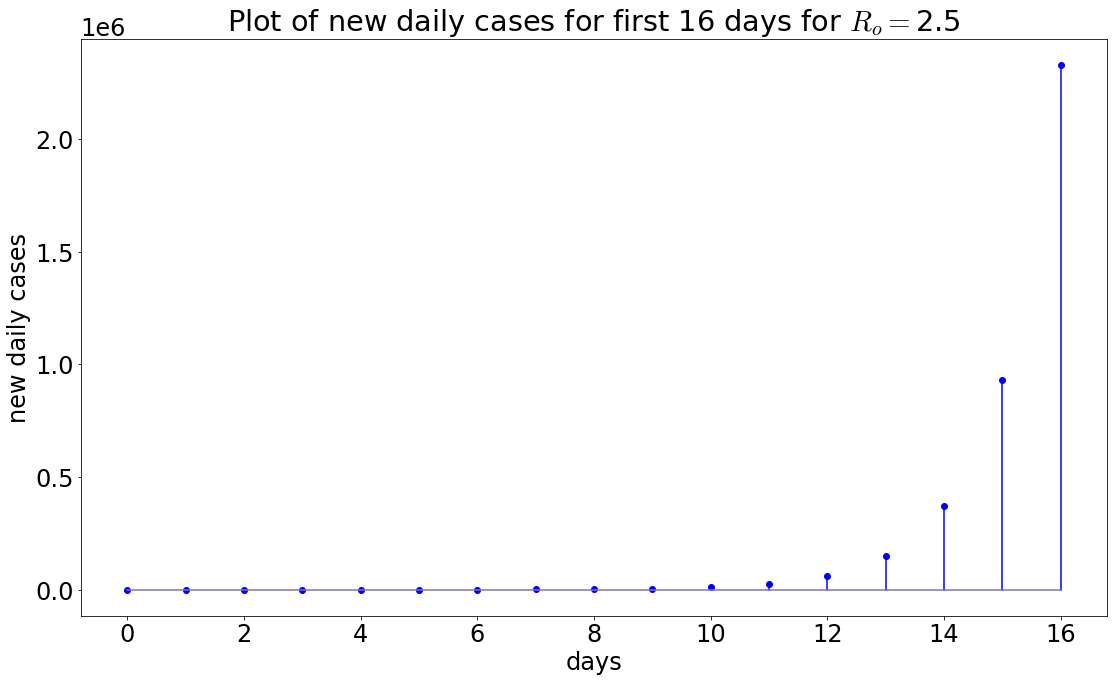

In [6]:
x=np.zeros(120)
x[0]=1
plt.rcParams['figure.figsize'] = [16, 10]
Ro=2.5
b=np.array([1, 0])
a=np.array([1, -Ro])
y=sp.lfilter(b, a, x)
for i in range(len(y)):
    if y[i]>=1e6:
        break
print(r'Number of days taken to reach 1 million infections with Ro = 2.5: ', i)
n=np.arange(i+1)
custom_stem(n, y[0:i+1], title=r'Plot of new daily cases for first '+str(i)+' days for $R_{o} = $' + str(Ro), xlabel=r'days', ylabel=r'new daily cases')
plt.savefig('Q1_3.png')

Question 5
---------------

Transfer function of integrator 
  z
-----
z - 1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


total numer of infections after 20 days=  60632979


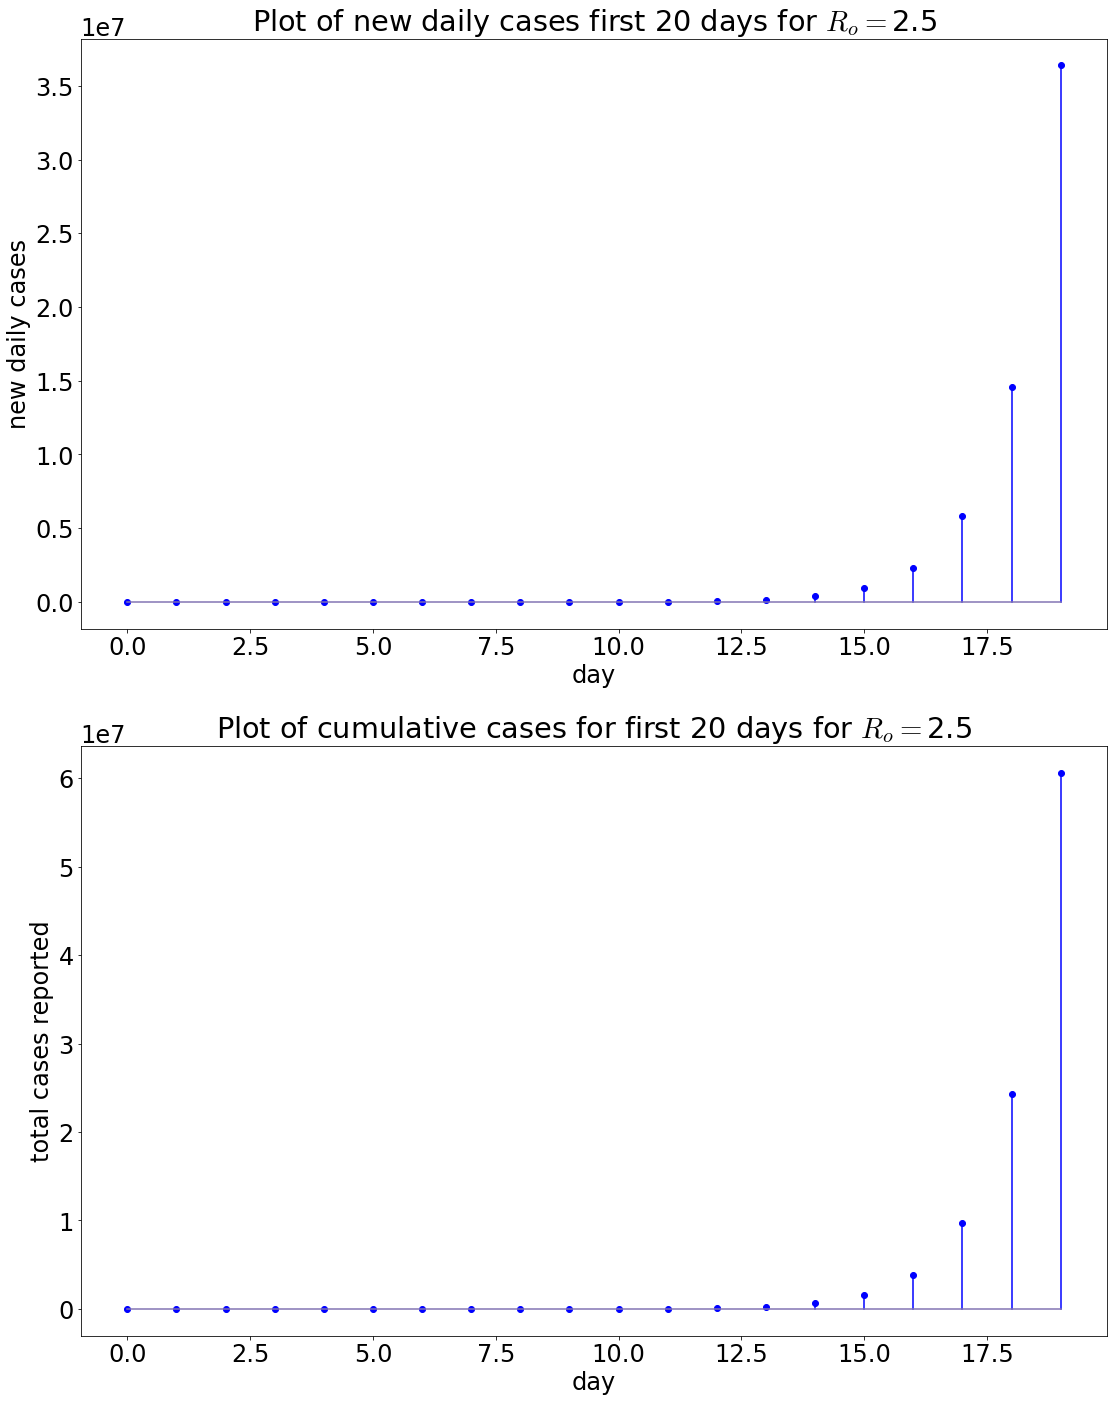

In [8]:
bi=np.array([1, 0])
ai=np.array([1, -1])
print(r'Transfer function of integrator', control.TransferFunction(bi, ai, dt=True))
x=np.zeros(20)
x[0]=1
n=np.arange(20)
plt.rcParams['figure.figsize'] = [16, 20]
Ro=2.5
b=np.array([1, 0])
a=np.array([1, -Ro])
y=sp.lfilter(b, a, x)
plt.subplot(211)
custom_stem(n, y, title=r'Plot of new daily cases first 20 days for $R_{o} = $' + str(Ro), xlabel=r'day', ylabel=r'new daily cases')

plt.subplot(212)
yc=sp.lfilter(bi, ai, y)
custom_stem(n, yc, title=r'Plot of cumulative cases for first 20 days for $R_{o} = $' + str(Ro), xlabel=r'day', ylabel=r'total cases reported')

print('total numer of infections after 20 days= ', int(yc[-1])) #Rounded to integer

plt.savefig('Q1_5.png')

Problem 2
---------------

Question 1
---------------

Transfer function hm(z):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Number of days taken to reach 1 million new daily infections with Ro = 2.5:  94


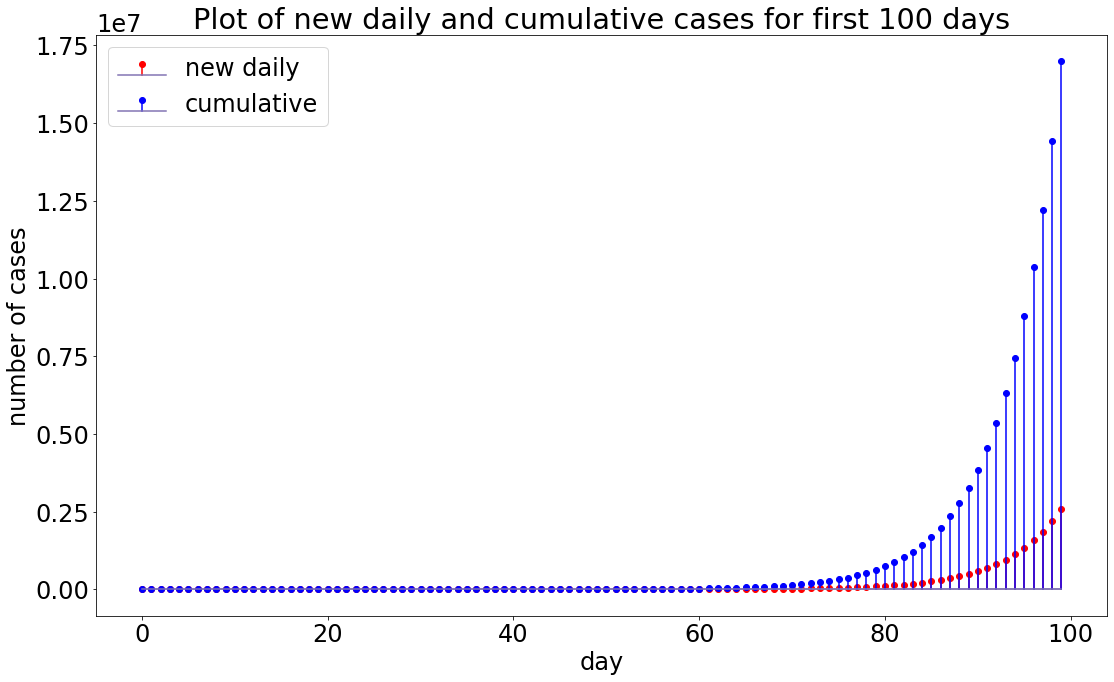

In [9]:
M=12
coeffs=np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
bm=np.zeros(13)
bm[0]=1
am=np.hstack((np.array([1]), -1*coeffs))
print(r'Transfer function hm(z): ', control.TransferFunction(bm, am, dt=True))

n=np.arange(100)
x=np.zeros(100)
x[0]=1
y=sp.lfilter(bm, am, x)
plt.rcParams['figure.figsize'] = [16, 10]
custom_stem(n, y, label='new daily', xlabel=r'day', ylabel=r'number of cases', color='r')
yc=sp.lfilter(bi, ai, y)
custom_stem(n, yc, label='cumulative', title=r'Plot of new daily and cumulative cases for first 100 days', xlabel=r'day', ylabel=r'number of cases')
plt.legend(loc='upper left')

for i in range(len(y)):
    if y[i]>=1e6:
        break
print(r'Number of days taken to reach 1 million new daily infections with Ro = 2.5: ', i)
plt.savefig('Q2.png')

Problem 3
---------------

Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Cumulative Number of infections after 100 days for rho value of  0.25 77744.79764772893
Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1

Cumulative Number of infections after 100 days for rho value of  0.5 133.89869375648092
Transfer function hm(z, p):  
                                                             z^12
-------------------------------------------------------------------------------------------------------------------------------
z^12 - 0.1 z^11 - 0.15 z^10 - 0.25 z^9 - 0.26 z^8 - 0.34 z^7 - 0.42 z^6 - 0.25 z^5 - 0.2 z^4 - 0.15 z^3 - 0.1 z^2 - 0.1 z - 0.1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Cumulative Number of infections after 100 days for rho value of  0.75 2.5309944507906685


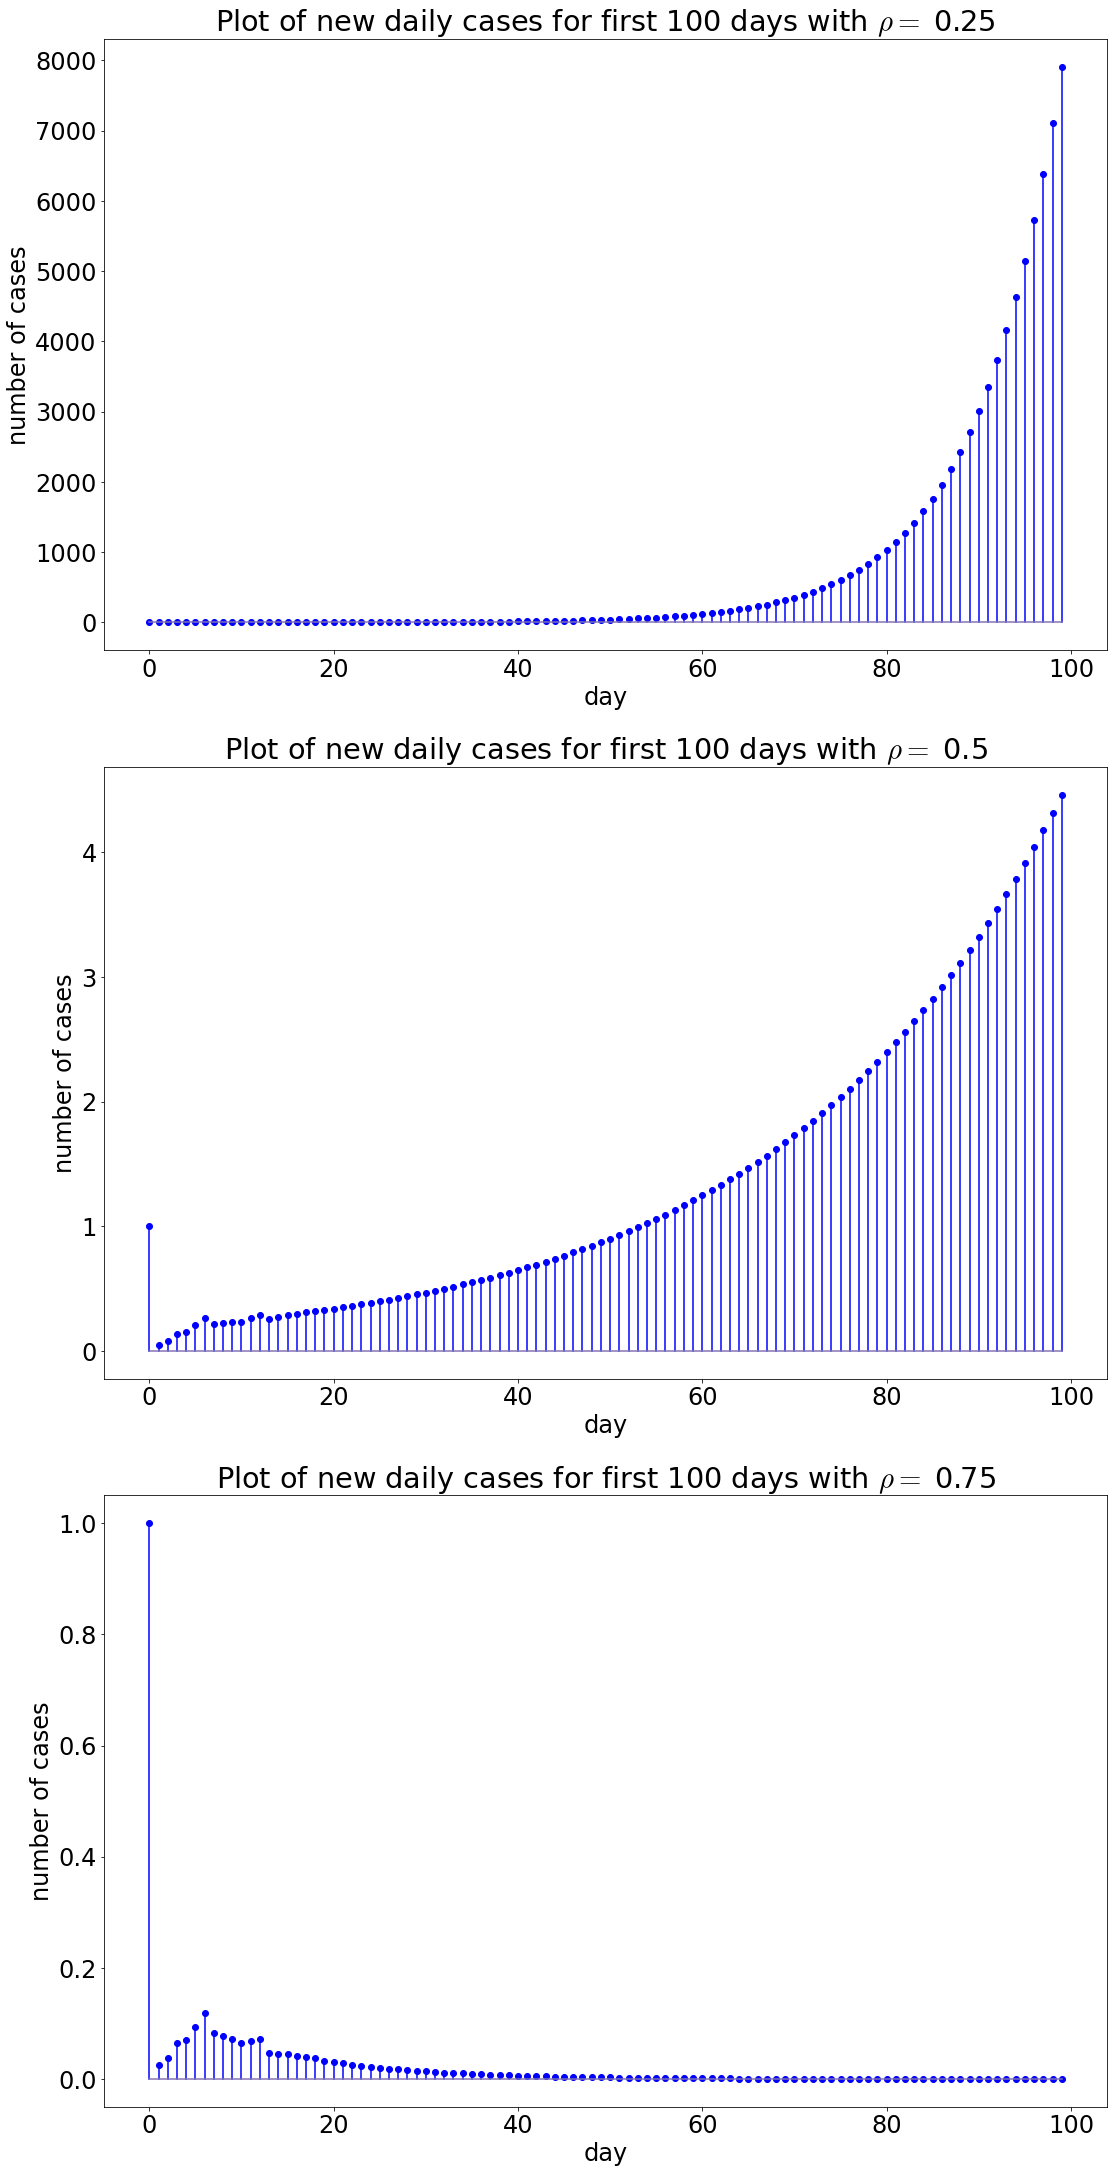

In [10]:
M=12
rho=[0.25, 0.5, 0.75]
coeffs=np.array([.1, .15, .25, .26, .34, .42, .25, .2, .15, .1, .1, .1])
bmp=[]
amp=[]
plt.rcParams['figure.figsize'] = [16, 40]
n=np.arange(100)
x=np.zeros(100)
x[0]=1
y=[]
yc=[]
for i in range(len(rho)):
        bm=np.zeros(13)
        bm[0]=1
        bmp.append(bm)
        amp.append(np.hstack((np.array([1]), -1*(1-rho[i])*coeffs)))
        print(r'Transfer function hm(z, p): ', control.TransferFunction(bm, am, dt=True))
        y.append(sp.lfilter(bmp[i], amp[i], x))
        plt.subplot(410+i+1)
        custom_stem(n, y[i], title=r'Plot of new daily cases for first 100 days with $\rho = $ '+str(rho[i]), xlabel=r'day', ylabel=r'number of cases')
        yc.append(sp.lfilter(bi, ai, y[i]))
        print('Cumulative Number of infections after 100 days for rho value of ', rho[i], yc[i][-1])
        

plt.savefig('Q3.png')

Problem 4
---------------

first order t.f for Ro =  1.15 
   z
--------
z - 1.15



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Inflection point using first difference:  85

Inflection point using second difference:  85


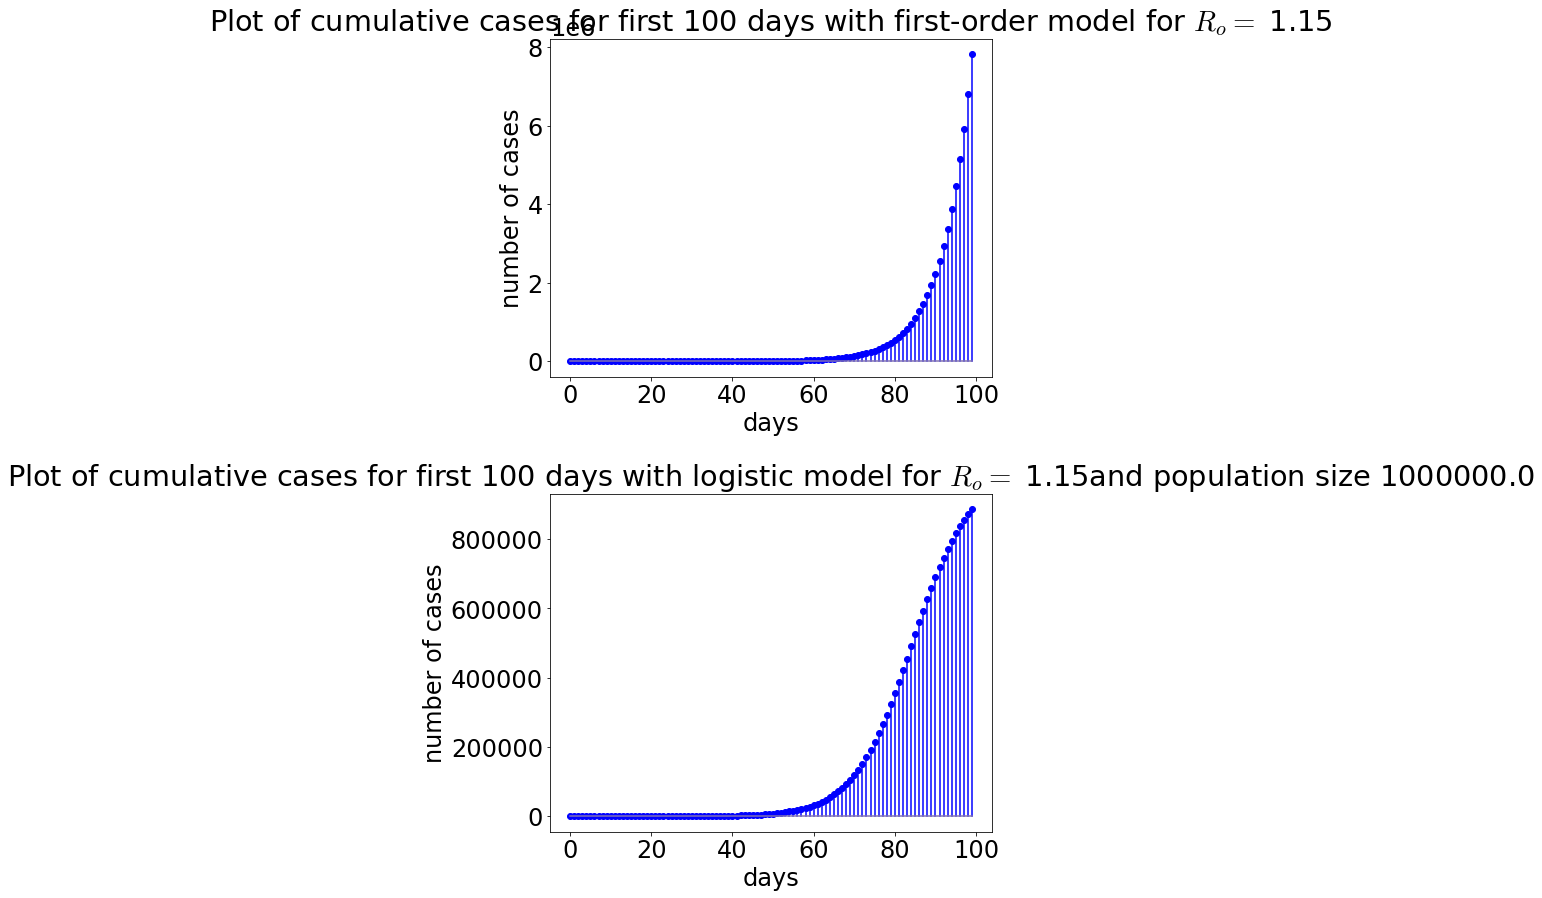

In [11]:
k=1e6
Ro=1.15
n=np.arange(100)
sigmoid=(-1/(Ro-1))+k/(1 + (Ro**-(n+1))*(k*(Ro-1)-Ro))

b_fo=np.array([1, 0])
a_fo=np.array([1, -Ro])
print('first order t.f for Ro = ', Ro, control.TransferFunction(b_fo, a_fo, dt=True))


x=np.zeros(100)
x[0]=1
y=sp.lfilter(b_fo, a_fo, x)
yc=sp.lfilter(bi, ai, y)

plt.rcParams['figure.figsize'] = [16, 13]
plt.subplot(211)
custom_stem(n, yc, title=r'Plot of cumulative cases for first 100 days with first-order model for $R_{o} =$ '+str(Ro), xlabel=r'days', ylabel=r'number of cases')
plt.subplot(212)
custom_stem(n, sigmoid, title=r'Plot of cumulative cases for first 100 days with logistic model for $R_{o} =$ '+str(Ro)+'and population size ' + str(k), xlabel=r'days', ylabel=r'number of cases')
plt.savefig('Q4.png')

b_fd=np.array([1, -1])
a_fd=np.array([1, 0])
b_sd=np.array([1, -2, 1])
a_sd=np.array([1, 0, 0])

fd=sp.lfilter(b_fd, a_fd, sigmoid)
sd=sp.lfilter(b_sd, a_sd, sigmoid)

peaks=sp.find_peaks(fd, prominence=0.6)[0]

for i in range(len(sd)):
    if i==0:
        continue
    if i==len(sd)-1:
        break
    else:
        if (sd[i-1]>=0 and sd[i+1]<=0) or (sd[i-1]<=0 and sd[i+1]>=0):
            break
        else:
            continue
print('Inflection point using first difference: ', peaks[0])
print('\nInflection point using second difference: ', i)
